# Local Search

In many problems, the path to the goal is irrelevant; the goal state itself is the solution to the problem.
 
Local search algorithms operate using a single current node and move to its neighbors without retraining the path.

Usually, local search is guided by a heuristic function.

**Advantages**

- These types of algorithm use little memory
- These types of algorithm can find a solution in large or infinite state space where we can’t use the classic search


## Example: Eight Queens Problem

Place 8 queens on a 8x8 board, so that no queens attacks the others. 

Usually, this type of approach uses a complete-state formulation: each state has all the elements of the solution (i.e. 8 queens on the boards), what we do is modify the current state until we reach a solution.

In the case of the 8 queens problem a goal can be implicitly defined checking that there are no conflicts in the current state. 

In [174]:
class EightQueensProblem:
    def __init__(self, initial_state, goal_state=None):
        self.initial_state = initial_state
        self.goal_state = goal_state
        
    def successors(self, state):
        actions = self.actions(state)
        return [(self.result(state, action), action) for action in actions]
    
    def actions(self, state):
        actions = []
        for c, r in enumerate(state):
            actions += [(c, new_r) for new_r in range(8) if new_r != r]
        return actions
    
    def result(self, state, action):
        new_state = state[:]
        c, r = action
        new_state[c] = r
        return new_state
    
    def goal_test(self, state):
        return self.heuristic(state) == 0
    
    def cost(self, state, cost):
        return 1
    
    def value(self, state):
        # we can use the value to use the cost as an utility function
        return - self.heuristic(state)
            
    def heuristic(self, state):
        conflict = 0
        for col1 in range(8):
            row1 = state[col1]
            for col2 in range(col1+1, 8):
                row2 = state[col2]
                if row1 == row2:
                    conflict += 1      
                if abs(row1 - row2) == abs(col1 - col2):
                    conflict += 1           
        return conflict                

We can now try our implementation of the problem:

In [175]:
problem = EightQueensProblem([1, 1, 1, 1, 1, 1, 1, 1])
actions = problem.actions(problem.initial_state)
print(f'Possible actions: {[action for action in actions]}')
print(f'State resulting from appling action {actions[0]} to the state {problem.initial_state}: {problem.result(problem.initial_state, actions[0])}')
print(f'Successors of the initial state: {problem.successors(problem.initial_state)}')
print(f'Heuristic of a state: {problem.heuristic(problem.initial_state)}')
print(f'Heuristic of a solution: {problem.heuristic([1, 5, 8, 6, 3, 7, 2, 4])}')
print(f'Goal test of a solution: {problem.goal_test([1, 5, 8, 6, 3, 7, 2, 4])}')


Possible actions: [(0, 0), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
State resulting from appling action (0, 0) to the state [1, 1, 1, 1, 1, 1, 1, 1]: [0, 1, 1, 1, 1, 1, 1, 1]
Successors of the initial state: [([0, 1, 1, 1, 1, 1, 1, 1], (0, 0)), ([2, 1, 1, 1, 1, 1, 1, 1], (0, 2)), ([3, 1, 1, 1, 1, 1, 1, 1], (0, 3)), ([4, 1, 1, 1, 1, 1, 1, 1], (0, 4)), ([5, 1, 1, 1, 1, 1, 1, 1], (0, 5)), ([6, 1, 1, 1, 1, 1, 1, 1], (0, 6)), ([7, 1, 1, 1, 1, 1, 1, 1], (0, 7)), ([1, 0, 1, 1, 1, 1, 1, 1], (1, 0)), ([1, 2, 1, 1, 1, 1, 1, 1], (1, 2)), ([1, 3, 1, 1, 1, 1, 1, 1], (1, 3)), ([1, 4, 1, 1, 1, 1, 1, 1], (1, 4

### Node class

We can reuse the node implementation from the classical search algorithms (mainly for the expand method).

In [176]:
from search.node import Node

### Hill Climbing

The hill climbing algorithms starts from an initial state (at random, or given) and moves to the "better" neighbors, guided by the problem heuristics, until it reaches a peak.

The success of this algorithm depends on the shape of the state space.

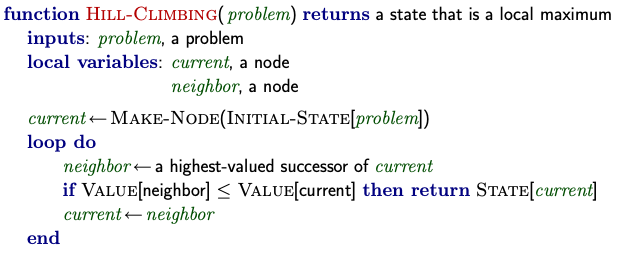

In [177]:
from IPython.display import Image
Image(filename='images/hill_climbing.png') 

In [178]:
class HillClimbingCost:
    def __init__(self, problem):
        self.problem = problem
        
    def run(self):
        current = Node(state=self.problem.initial_state, parent=None, action=None, depth=0, cost=0)
        
        while True:
            # in this case we used the cost so max -> min and <= -> >=
            best_neighbor = min(current.expand(self.problem), key=lambda node: self.problem.heuristic(node.state))
            if self.problem.heuristic(best_neighbor.state) >= self.problem.heuristic(current.state):
                return current, self.problem.heuristic(current.state)
            current = best_neighbor

If we want to implement the hill climbing algorithm as shown in the book, we can just define the utility function as $U(s) = -h(s)$.

In [179]:
class HillClimbingUtility:
    def __init__(self, problem):
        self.problem = problem
        
    def run(self):
        current = Node(state=self.problem.initial_state, parent=None, action=None, depth=0, cost=0)
        
        while True:
            best_neighbor = max(current.expand(self.problem), key=lambda node: self.problem.value(node.state))
            if self.problem.value(best_neighbor.state) <=  self.problem.value(current.state):
                return current, self.problem.heuristic(current.state)
            current = best_neighbor

we can now try to solve our problem:

In [180]:
import random 

initial = [random.randint(0, 7) for _ in range(8)]
print(initial)
problem = EightQueensProblem(initial)
search_cost = HillClimbingCost(problem)
search_utility = HillClimbingUtility(problem)
print(search_cost.run())
print(search_utility.run())

[0, 3, 6, 5, 4, 1, 5, 0]
([1, 3, 7, 2, 4, 1, 5, 0], 2)
([1, 3, 7, 2, 4, 1, 5, 0], 2)


Hill Climbing doesn't always return a real solution. It is estimated that for the _8_-Queens problem, Hill Climbing get stuck in a local minimum 86% of the times.

Can we somehow fix this behaviour? Yes! And the solution to this problem is pretty trivial.
If the algorithm fails to provide a solution, run it again!

The Random-Restart Hill Climbing is considered an enhanced variant of the Hill Climbing algorithm and simply consists in re-running the algorithm, with a different, randomly chosen, initial state.

In [181]:
maximum_iterations = 100

for i in range(maximum_iterations): 
    result = HillClimbingCost(EightQueensProblem([random.randint(0, 7) for _ in range(8)])).run()
    if result[1] == 0:
        print(f"Found Solution: {result} in {i} iterations.")
        break

Found Solution: ([2, 5, 1, 6, 0, 3, 7, 4], 0) in 5 iterations.


The search algorithm is instantiated inline (we avoid using the `problem` and `initial` variables) so that we can randomize the initial state for every instance of the algorithm.

## Simulated Annealing

To avoid getting stuck in a local maximum or minimum, we select a random move instead of always choosing the best one.

- If the move is better than before, it is always accepted.
- If the move is worse, it is accepted with a certain probability.

- This probability of accepting "bad" moves decreases:

- Proportionally to the change in energy, $\Delta E$: the worse the move, the less likely it is to be selected.
- Inversely proportional to the temperature, $T$: as the temperature increases, we are less likely to choose "bad" moves.

Usually, the temperature decreases following a specific schedule, which is a function that determines how the temperature decreases (e.g., exponentially, linearly, etc.).

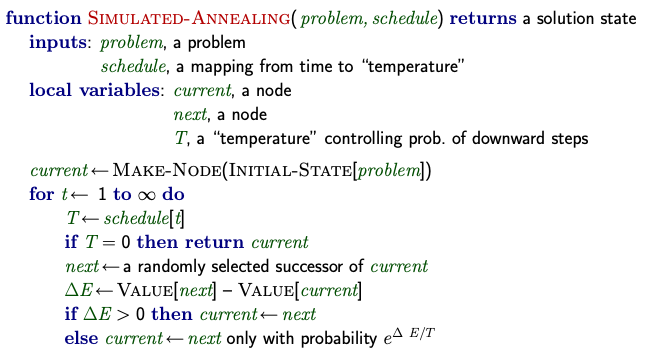

In [182]:
from IPython.display import Image
Image(filename='images/simulated_annealing.png') 

In [183]:
import random, math


class SimulatedAnnealingCost:
    def __init__(self, problem, schedule, max_time):
        self.problem = problem
        self.schedule = schedule
        self.max_time = max_time
        
    def run(self):
        current = Node(state=self.problem.initial_state, parent=None, action=None, depth=0, cost=0)
        
        for time in range(self.max_time):
            temperature = self.schedule(time)
            
            if temperature == 0:
                return current
            
            neighbour = random.choice(current.expand(self.problem))

            delta = self.problem.heuristic(current.state) - self.problem.heuristic(neighbour.state)
            
            if delta > 0 or random.uniform(0, 1) < math.exp(delta/temperature):
                print(current, self.problem.heuristic(current.state))
                current = neighbour

            if self.problem.heuristic(current.state) == 0:
                break
                
        return current, self.problem.heuristic(current.state)
        

As we did with Hill Climbing we can define the utility version of this algorithm:

In [184]:
import random, math


class SimulatedAnnealingUtility:
    def __init__(self, problem, schedule, max_time):
        self.problem = problem
        self.schedule = schedule
        self.max_time = max_time
        
    def run(self):
        current = Node(state=self.problem.initial_state, parent=None, action=None, depth=0, cost=0)
        
        for time in range(self.max_time):
            temperature = self.schedule(time)
            
            if temperature == 0:
                return current
            
            neighbour = random.choice(current.expand(self.problem))

            delta = self.problem.value(neighbour.state) - self.problem.value(current.state)
            
            if delta > 0 or random.uniform(0, 1) < math.exp(delta/temperature):
                print(current, self.problem.heuristic(current.state))
                current = neighbour

            if self.problem.heuristic(current.state) == 0:
                break
                
        return current, self.problem.heuristic(current.state)

we can try our implementation:

In [185]:
def scheduler(time):
    initial_temp = 1000
    lamb = 0.001
    return  initial_temp -  lamb * time

initial = [random.randint(0, 7) for _ in range(8)]
print(initial)
problem = EightQueensProblem(initial)
search_cost = SimulatedAnnealingCost(problem, scheduler, 10000)
search_utility = SimulatedAnnealingUtility(problem, scheduler, 10000)
print(search_cost.run())
print(search_utility.run())

[3, 6, 0, 5, 7, 7, 7, 3]
[3, 6, 0, 5, 7, 7, 7, 3] 6
[3, 6, 0, 5, 6, 7, 7, 3] 7
[3, 7, 0, 5, 6, 7, 7, 3] 9
[3, 7, 0, 5, 6, 7, 5, 3] 8
[3, 7, 0, 5, 6, 7, 5, 2] 6
[1, 7, 0, 5, 6, 7, 5, 2] 6
[1, 7, 0, 2, 6, 7, 5, 2] 4
[1, 7, 0, 2, 6, 7, 5, 1] 5
[1, 7, 0, 2, 6, 2, 5, 1] 4
[1, 7, 0, 2, 6, 2, 4, 1] 5
[1, 3, 0, 2, 6, 2, 4, 1] 5
[0, 3, 0, 2, 6, 2, 4, 1] 5
[0, 3, 0, 2, 2, 2, 4, 1] 7
[0, 3, 0, 2, 2, 2, 7, 1] 5
[3, 3, 0, 2, 2, 2, 7, 1] 5
[1, 3, 0, 2, 2, 2, 7, 1] 6
[3, 3, 0, 2, 2, 2, 7, 1] 5
[3, 3, 0, 2, 2, 1, 7, 1] 5
[3, 3, 4, 2, 2, 1, 7, 1] 7
[3, 5, 4, 2, 2, 1, 7, 1] 8
[3, 5, 4, 2, 2, 1, 7, 7] 8
[3, 5, 4, 0, 2, 1, 7, 7] 8
[3, 5, 4, 0, 2, 1, 2, 7] 9
[3, 5, 4, 0, 5, 1, 2, 7] 6
[3, 5, 1, 0, 5, 1, 2, 7] 7
[3, 5, 1, 0, 5, 1, 2, 0] 8
[3, 5, 3, 0, 5, 1, 2, 0] 7
[3, 5, 3, 6, 5, 1, 2, 0] 7
[3, 5, 3, 6, 2, 1, 2, 0] 7
[3, 5, 0, 6, 2, 1, 2, 0] 8
[3, 5, 0, 6, 2, 1, 2, 6] 8
[3, 1, 0, 6, 2, 1, 2, 6] 8
[3, 1, 0, 2, 2, 1, 2, 6] 9
[3, 3, 0, 2, 2, 1, 2, 6] 8
[3, 3, 0, 2, 2, 1, 6, 6] 6
[3, 3, 0, 2, 0, 1, 6, 6] 6
[3,

# Genetic Algorithms

The Genetic Algorithm generates new states by combining two parents rather than modifying a single state.

In this algorithm each state (or **individual**) is represented as a string over a finite alphabet.

- The algorithm starts with *k* randomly selected states, called the **population**.
- A **fitness function** evaluates each individual.
- The probability of selection for reproduction is proportional to the fitness score.
- A **crossover point** is chosen randomly for each pair of parents.
- The child inherits traits from both parents at the crossover point.
- Each individual may undergo a small random **mutation** at any location.

This process combines **exploitation** (selecting the fittest individuals) with **exploration** (random mutations and crossover).

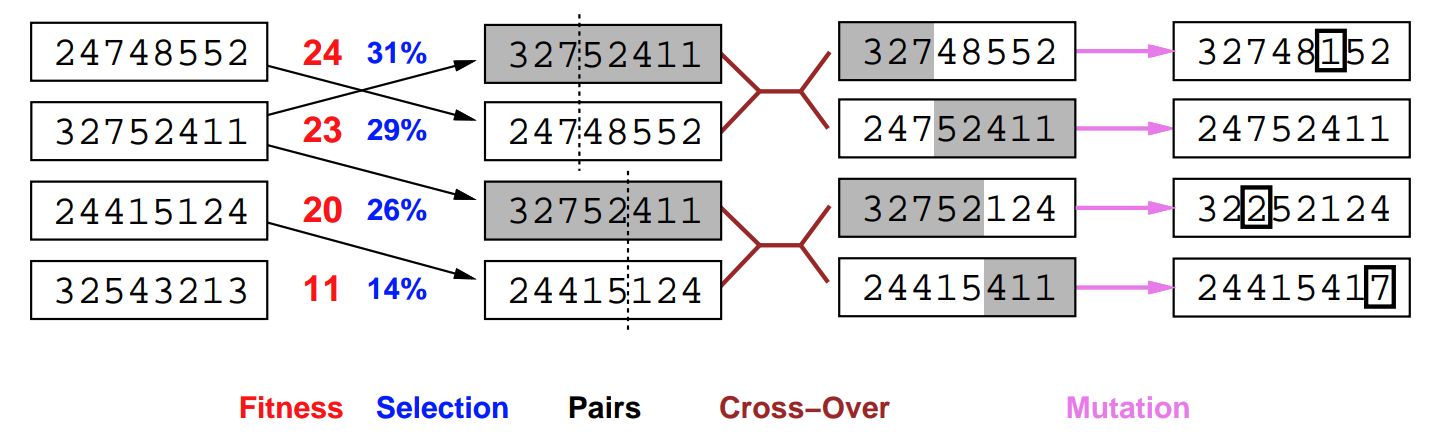

In [186]:
from IPython.display import Image
Image(filename='images/genetic_example.png') 

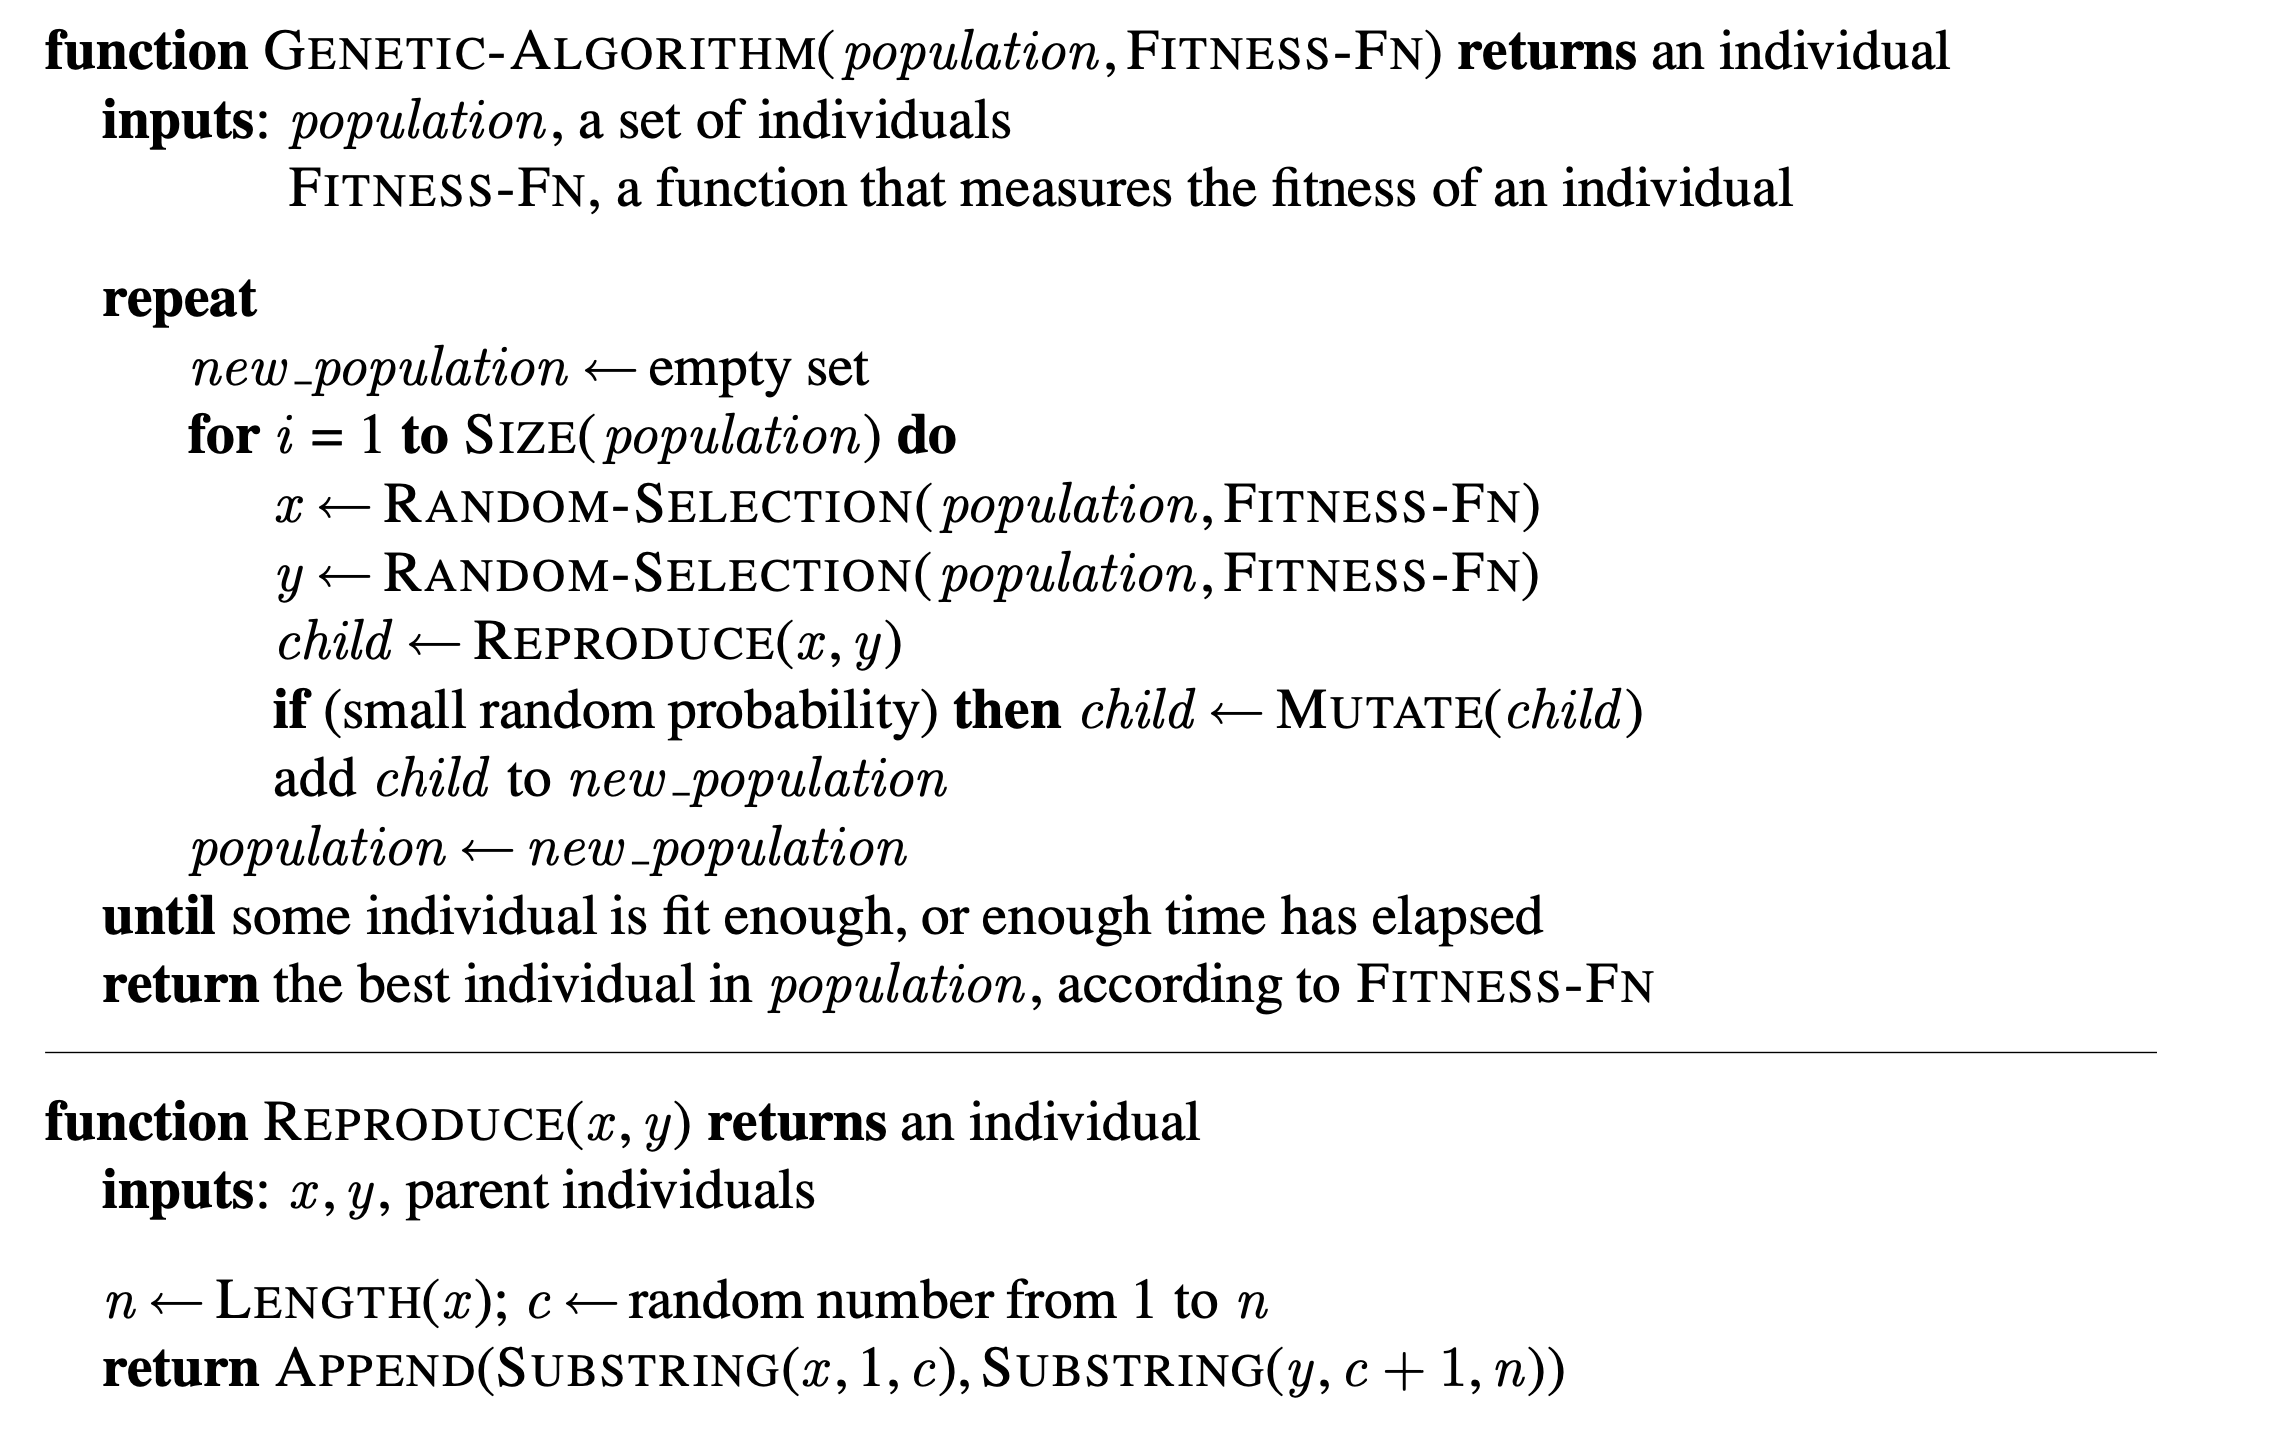

In [187]:
from IPython.display import Image
Image(filename='images/genetic.png') 

In [188]:
import random

class GeneticAlgorithm:
    def __init__(self, problem, population_size, max_generation, state_len, gene_pool, mutation_rate):
        self.problem = problem
        self.gene_pool = gene_pool
        self.mutation_rate = mutation_rate
        self.population_size = population_size
        self.state_len = state_len
        self.max_generation = max_generation
        
    def select(self, population):
        fitnesses = [1 / (1 + self.problem.heuristic(individual)) for individual in population]
        probability = [fitness / sum(fitnesses) for fitness in fitnesses]
        return random.choices(population, weights=probability, k=2)
    
    def crossover(self, state1, state2):
        crossover_point = random.randint(0, len(state1))
        return state1[:crossover_point] + state2[crossover_point:]
    
    def mutation(self, state):
        for i, _ in enumerate(state):
            if random.uniform(0, 1) < self.mutation_rate:
                state[i] = random.choice(self.gene_pool)
        return state
                
    def run(self):
        population = [random.sample(self.gene_pool, k=self.state_len) for _ in range(self.population_size)]
        best = None
        
        for _ in range(self.max_generation):
            population = [self.mutation(self.crossover(*self.select(population))) for _ in range(self.population_size)]
            best = max(population, key=self.problem.value)
            if self.problem.goal_test(best):
                break
                
        return best, self.problem.value(best)
        

we can now try our implementation:

In [189]:
search = GeneticAlgorithm(problem=problem, population_size=100, max_generation=1000, state_len=8, gene_pool=[0, 1, 2, 3, 4, 5, 6, 7], mutation_rate=0.1)

print(search.run())

([4, 2, 7, 3, 6, 0, 5, 1], 0)
